## ML_LAB04
## SUPPORT VECTOR MACHINE
### LAKSHITA SETHI - 21BDA54

#### 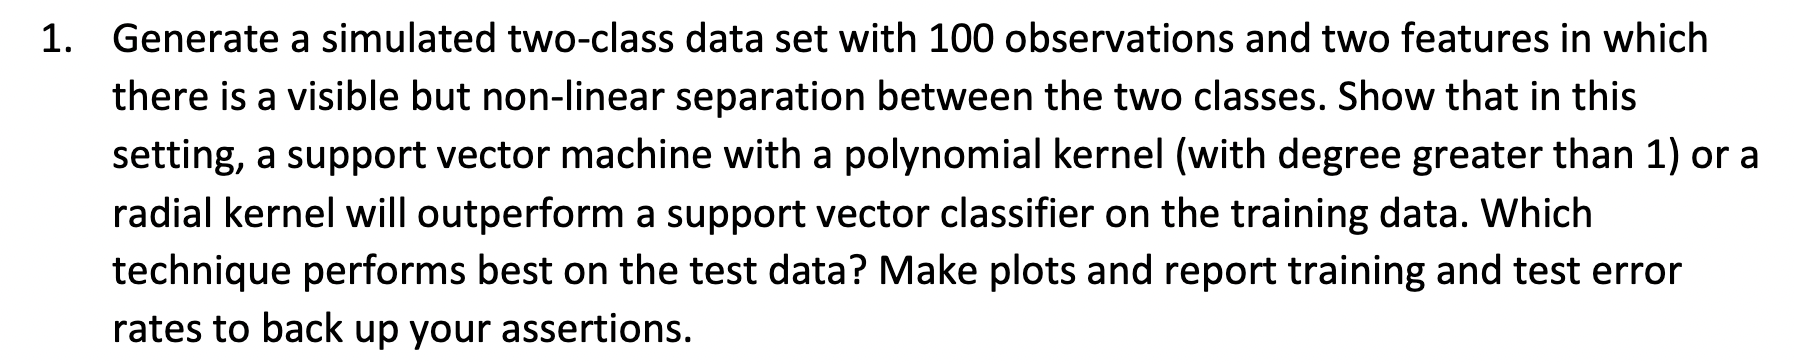

In [77]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [100]:
np.random.seed(0)
X = np.random.normal(0, 2, 100)
Y = X**2 + 3*X + np.random.normal(0, 1, 100)

In [80]:
c = list(range(0, 100))
c1 = np.random.randint(0, 100, size=50, dtype='l')
c2 = [x for x in c if x not in c1]
Y[c1] = Y[c1] + 5
Y[c2] = Y[c2] - 5

labels = np.asarray([1]*100)
labels[c2] = labels[c2] -2

In [82]:
M = np.column_stack((X,Y))
M

array([[ 3.52810469e+00,  3.49149875e+01],
       [ 8.00314417e-01, -8.30631265e+00],
       [ 1.95747597e+00, -1.56634493e+00],
       [ 4.48178640e+00,  2.45011652e+01],
       [ 3.73511598e+00,  3.39833159e+01],
       [-1.95455576e+00, -1.00997579e+01],
       [ 1.90017684e+00,  1.88975835e+01],
       [-3.02714417e-01,  8.43603796e+00],
       [-2.06437704e-01,  1.34624544e+00],
       [ 8.21197004e-01,  4.61847032e+00],
       [ 2.88087142e-01,  2.81481459e+00],
       [ 2.90854701e+00,  8.09133143e+00],
       [ 1.52207545e+00, -3.97828566e+00],
       [ 2.43350033e-01,  1.26993343e+01],
       [ 8.87726465e-01, -6.81676570e+00],
       [ 6.67348655e-01,  3.24985659e+00],
       [ 2.98815815e+00,  1.88408155e+01],
       [-4.10316528e-01, -1.12176000e+01],
       [ 6.26135403e-01, -7.11546888e+00],
       [-1.70819148e+00, -1.12844496e+01],
       [-5.10597963e+00,  1.11295146e+01],
       [ 1.30723719e+00, -5.46882014e+00],
       [ 1.72887240e+00,  1.84738551e+01],
       [-1.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(M, labels, test_size=0.1)

<ipython-input-97-463fd6ae4860>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy_down, 'k--', color='g')
<ipython-input-97-463fd6ae4860>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy_up, 'k--', color='g')


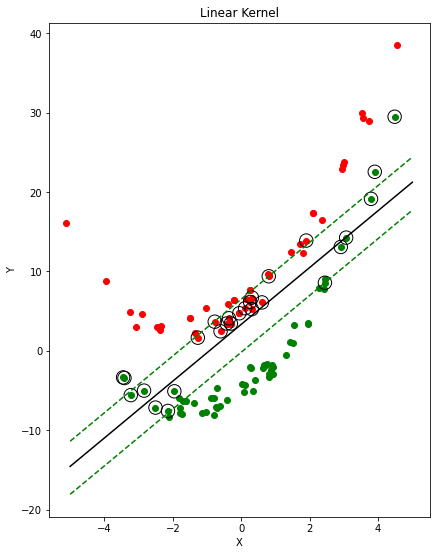

In [97]:
# fit the linear model
clf = svm.SVC(kernel='linear', C=10000)
clf.fit(X_train, y_train)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(221)
ax.grid()

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid()
ax.set_title("Linear Kernel")

plt.show()

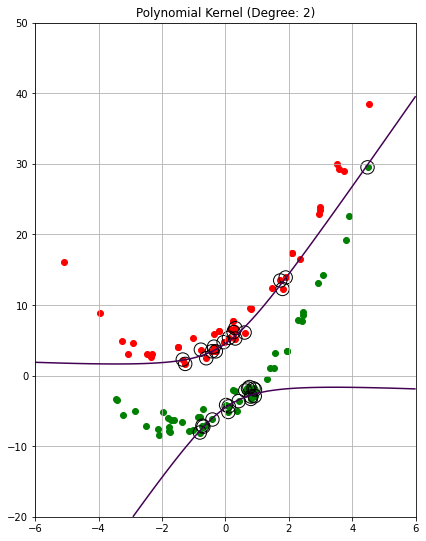

In [98]:
#fit polynomial model
clf_poly = svm.SVC(kernel='poly', degree=2, C=1000)
clf_poly.fit(X_train, y_train)

x_min = -6
x_max = 6
y_min = -20
y_max = 50

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf_poly.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(224)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_poly.support_vectors_[:, 0], clf_poly.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

plt.contour(XX, YY, Z, levels=[0])
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 2)")
plt.show()

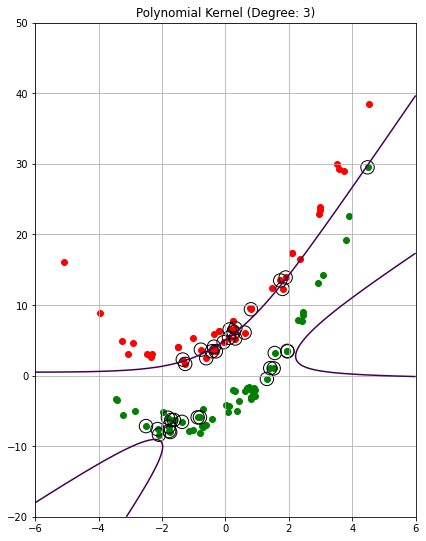

In [99]:
#fit polynomial model: degree 3
clf_poly_3 = svm.SVC(kernel='poly', degree=3, C=1000)
clf_poly_3.fit(X_train, y_train)

x_min = -6
x_max = 6
y_min = -20
y_max = 50

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf_poly_3.decision_function(np.c_[XX.ravel(), YY.ravel()])
p_poly = clf_poly.predict(M)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(223)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_poly_3.support_vectors_[:, 0], clf_poly_3.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

plt.contour(XX, YY, Z, levels=[0])
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 3)")
plt.show()

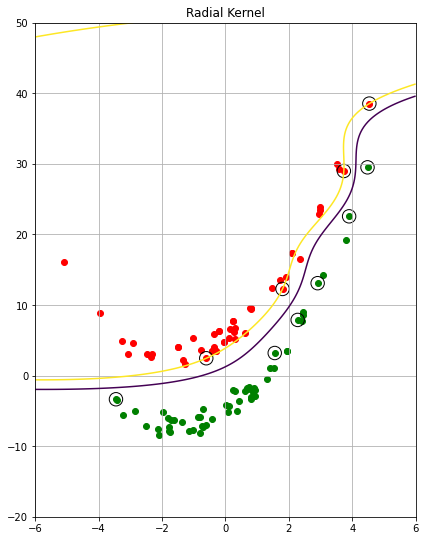

In [96]:
#fit radial kernel
clf_radial = svm.SVC(kernel='rbf', C=1000)
clf_radial.fit(X_train, y_train)

Z = clf_radial.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(224)

plt.scatter(X[c2], Y[c2], color='g')
plt.scatter(X[c1], Y[c1], color='r')
plt.scatter(clf_radial.support_vectors_[:, 0], clf_radial.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')


plt.contour(XX, YY, Z, levels=[0, 1])
ax.grid()
ax.set_title("Radial Kernel")

plt.show()

In [101]:
print("Training miss classification for linear kernel: "
      + str((len(X_train) - sum(y_train == clf.predict(X_train)))*100/len(X_train)))
print("Test miss classification for linear kernel: "
      + str((len(X_test) - sum(y_test == clf.predict(X_test)))*100/len(X_test)))

Training miss classification for linear kernel: 7.777777777777778
Test miss classification for linear kernel: 0.0


In [102]:
print("Training miss classification for polynomial kernel (degree 2): "
      + str((len(X_train) - sum(y_train == clf_poly.predict(X_train)))*100/len(X_train)))
print("Test miss classification for polynomial kernel (degree 2): "
      + str((len(X_test) - sum(y_test == clf_poly.predict(X_test)))*100/len(X_test)))

Training miss classification for polynomial kernel (degree 2): 15.555555555555555
Test miss classification for polynomial kernel (degree 2): 20.0


In [103]:
print("Training miss classification for polynomial kernel (degree 3): "
      + str((len(X_train) - sum(y_train == clf_poly_3.predict(X_train)))*100/len(X_train)))
print("Test miss classification for polynomial kernel (degree 3): "
      + str((len(X_test) - sum(y_test == clf_poly_3.predict(X_test)))*100/len(X_test)))

Training miss classification for polynomial kernel (degree 3): 10.0
Test miss classification for polynomial kernel (degree 3): 0.0


In [104]:
print("Training miss classification for radial kernel: "
      + str((len(X_train) - sum(y_train == clf_radial.predict(X_train)))*100/len(X_train)))
print("Test miss classification for radial kernel: "
      + str((len(X_test) - sum(y_test == clf_radial.predict(X_test)))*100/len(X_test)))

Training miss classification for radial kernel: 0.0
Test miss classification for radial kernel: 0.0


####  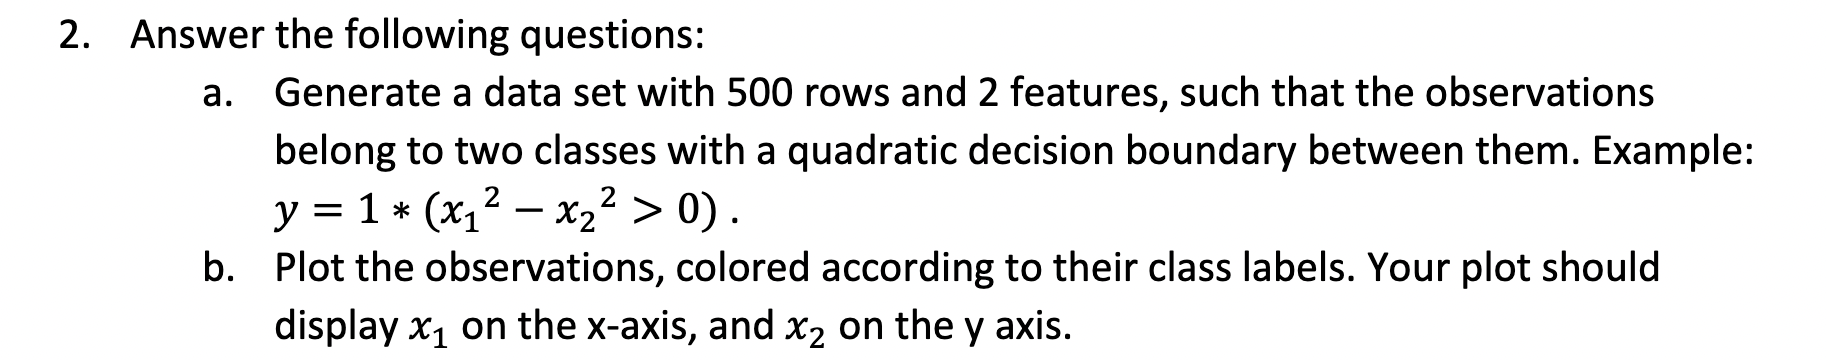

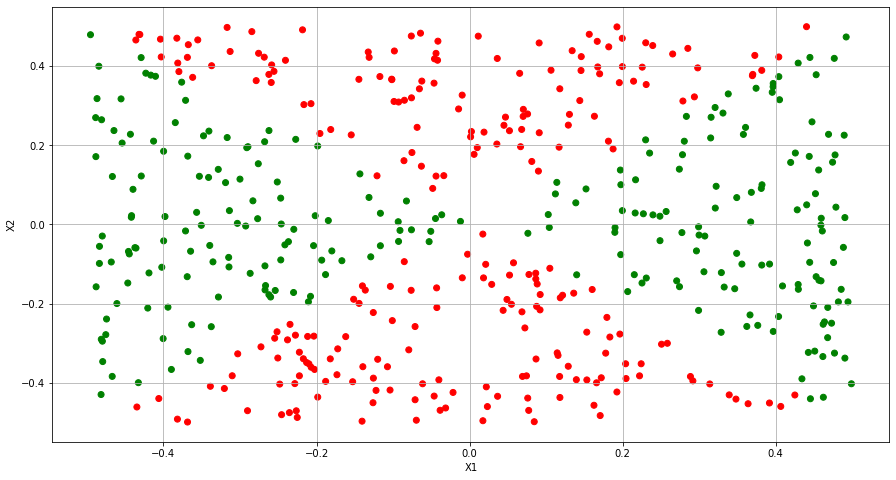

In [105]:
np.random.seed(0)
X1 = np.random.uniform(0, 1, 500) - 0.5
X2 = np.random.uniform(0, 1, 500) - 0.5
Y = ((X1**2 - X2**2) > 0).astype(int)
color= ['red' if l == 0 else 'green' for l in Y]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

### 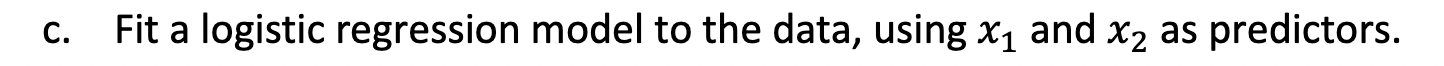

In [106]:
from sklearn.linear_model import LogisticRegression

X = np.column_stack((X1,X2))
clf = LogisticRegression(random_state=0, fit_intercept=True)
clf.fit(X, Y)

LogisticRegression(random_state=0)

### 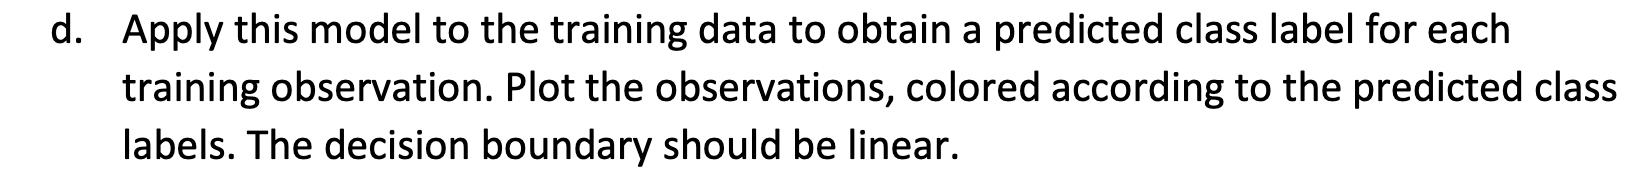

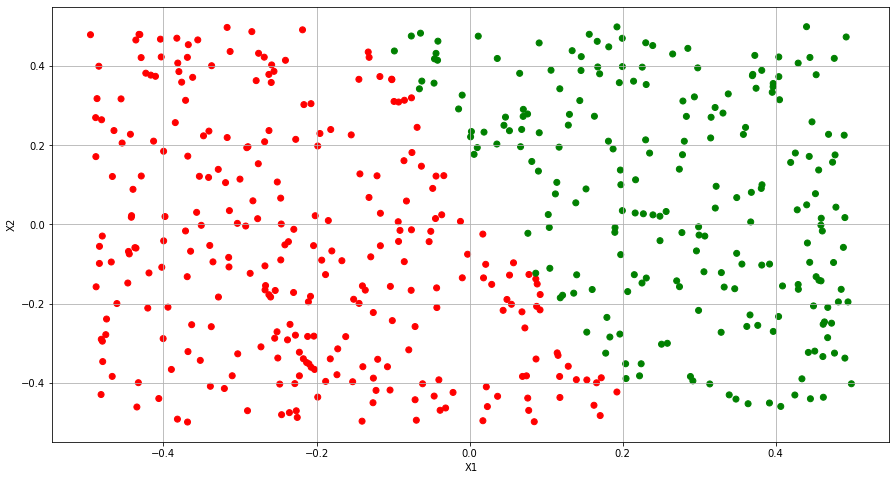

In [108]:
Y_train = clf.predict(X)

color= ['red' if l == 0 else 'green' for l in Y_train]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

### 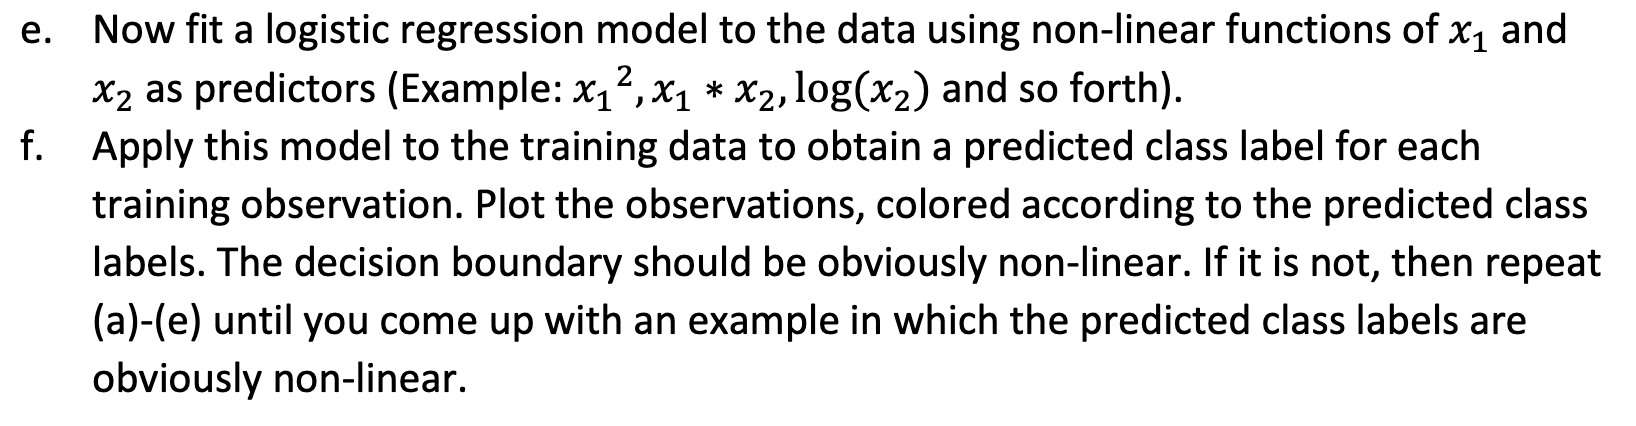

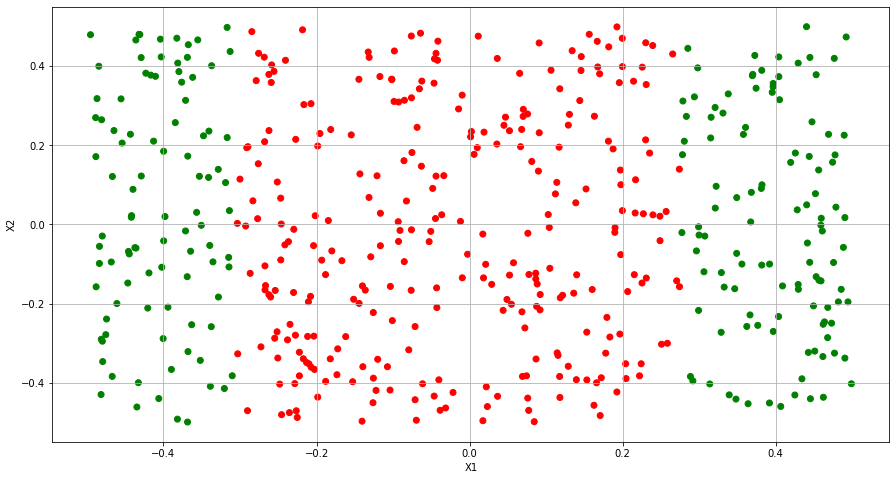

In [131]:
X1_2 = X1**2
X2_2 = X1**2

X_1 = np.column_stack((X1,X2,X1_2,X2_2))
clf_1 = LogisticRegression(random_state=0, fit_intercept=True)
clf_1.fit(X_1, Y)
Y_train_1 = clf_1.predict(X_1)

color= ['red' if l == 0 else 'green' for l in Y_train_1]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.show()

### 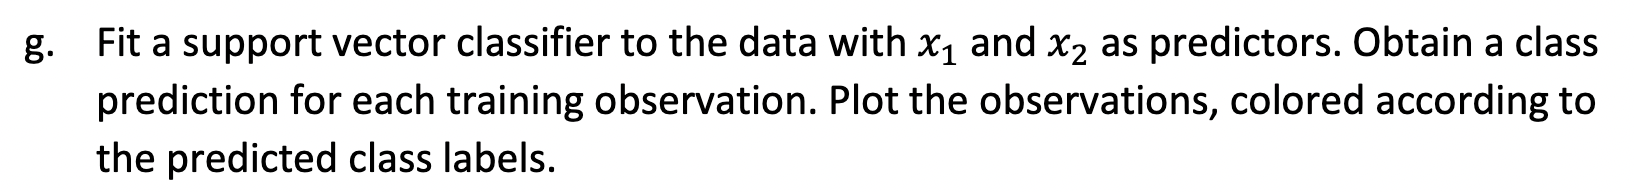

<ipython-input-138-e93ee9c20e03>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy_down, 'k--', color='g')
<ipython-input-138-e93ee9c20e03>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xx, yy_up, 'k--', color='g')


Text(0.5, 1.0, 'Linear Kernel')

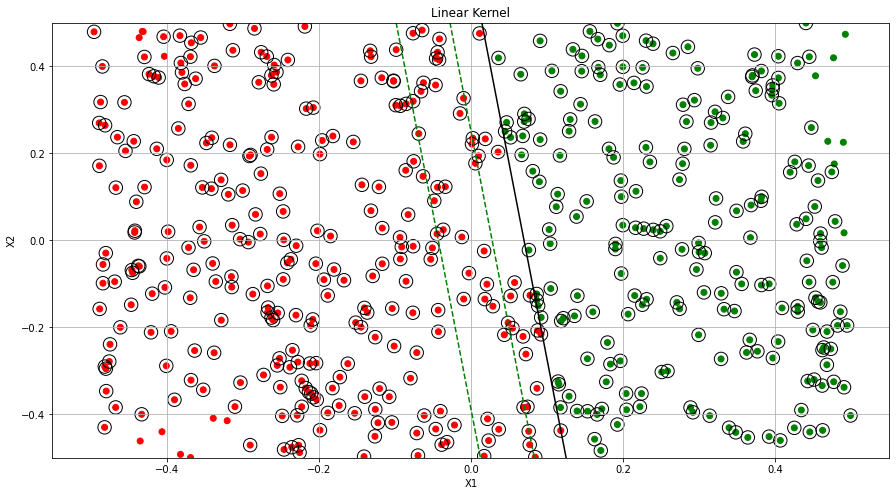

In [138]:
X_s = np.column_stack((X1,X2))

# fit the linear model
clf_s = svm.SVC(kernel='linear', C=100)
clf_s.fit(X, Y)
Y_train_s = clf_s.predict(X_s)
color= ['red' if l == 0 else 'green' for l in Y_train_s]

# get the separating hyperplane
w = clf_s.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-0.5, 0.5)
yy = a * xx - (clf_s.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = clf_s.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf_s.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.scatter(clf_s.support_vectors_[:, 0], clf_s.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--', color='g')
plt.plot(xx, yy_up, 'k--', color='g')

ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid()
ax.set_title("Linear Kernel")

### 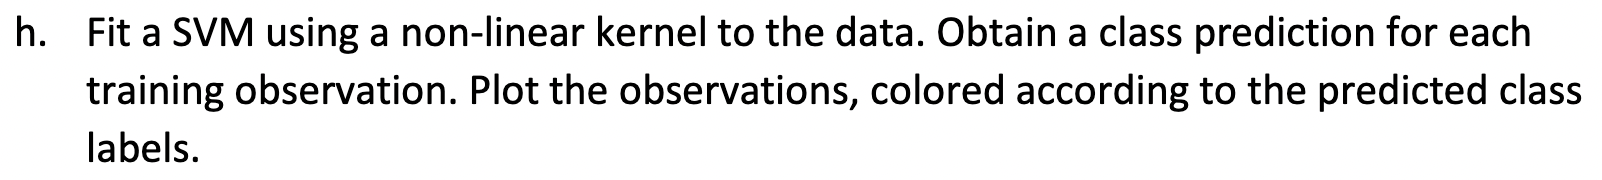

Text(0.5, 1.0, 'Polynomial Kernel (Degree: 2)')

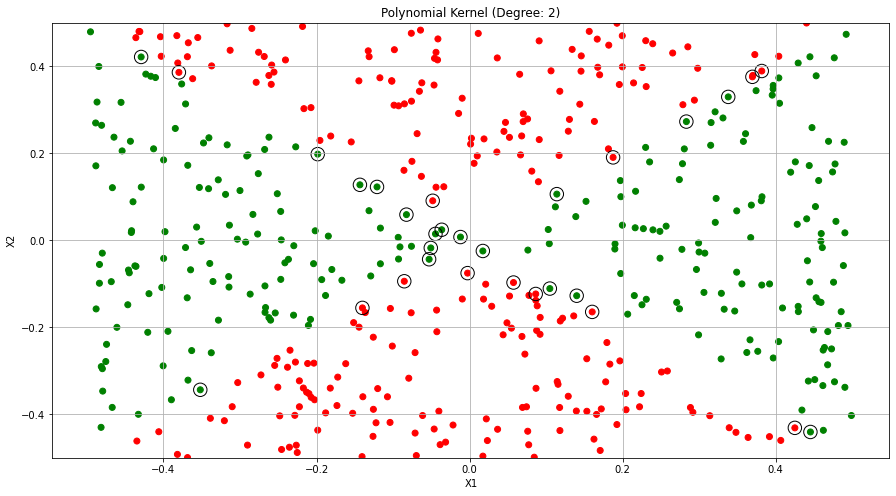

In [139]:
X_s2 = np.column_stack((X1,X2))

# fit the linear model
clf_s2 = svm.SVC(kernel='poly', degree=2, C=100)
clf_s2.fit(X_s2, Y)
Y_train_s2 = clf_s2.predict(X_s2)
color= ['red' if l == 0 else 'green' for l in Y_train_s2]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

plt.scatter(X1, X2, color=color)
plt.scatter(clf_s2.support_vectors_[:, 0], clf_s2.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='black')

ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid()
ax.set_title("Polynomial Kernel (Degree: 2)")

### 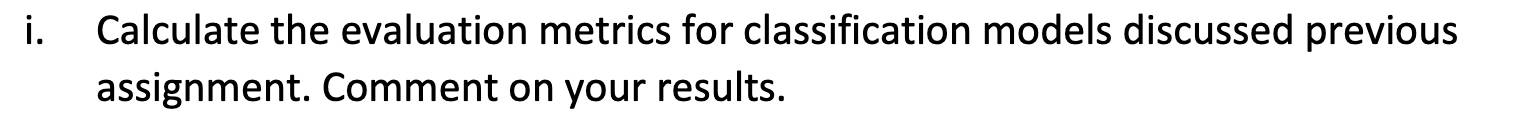

/Users/lakshitasethi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


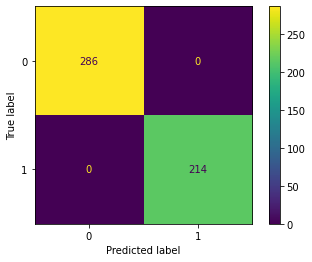

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_s, X_s, Y_train_s)
plt.show()

/Users/lakshitasethi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


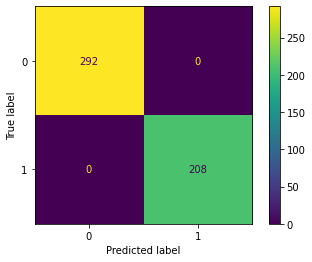

In [140]:
plot_confusion_matrix(clf_1, X_1, Y_train_1)
plt.show()

/Users/lakshitasethi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


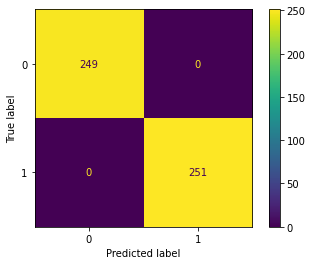

In [141]:
plot_confusion_matrix(clf_s2, X_s2, Y_train_s2)
plt.show()

In [143]:
## We got this 100% accuracy, that means we are dealing with overfitting of our classification model.
# We have 100% accuracy for true positives and false negatives.

#### Ref. https://amitrajan012.github.io/post/support-vector-machines_part5/